In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline

In [2]:
def runge(x):
    return 1/(1 + 25*(x**2))

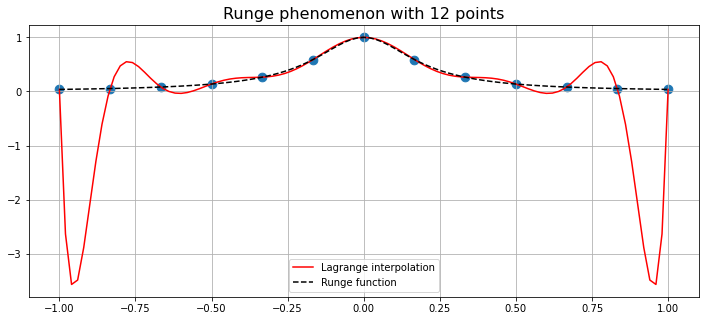

In [3]:
n = 12
x = [2*i/n - 1 for i in range(n+1)]
y = [runge(x_i) for x_i in x]

interpolator = lagrange(x, y)
y_interp = [interpolator(x_i) for x_i in np.linspace(-1, 1, 101)]
actuals = [runge(x_i) for x_i in np.linspace(-1, 1, 101)]
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(np.linspace(-1, 1, 101), y_interp, c='red', label="Lagrange interpolation")
ax.plot(np.linspace(-1, 1, 101), actuals, c='black', label="Runge function", linestyle="--")
ax.scatter(x, y, s=75)
ax.grid()
ax.legend()
ax.set_title(f"Runge phenomenon with {n} points", fontsize=16);

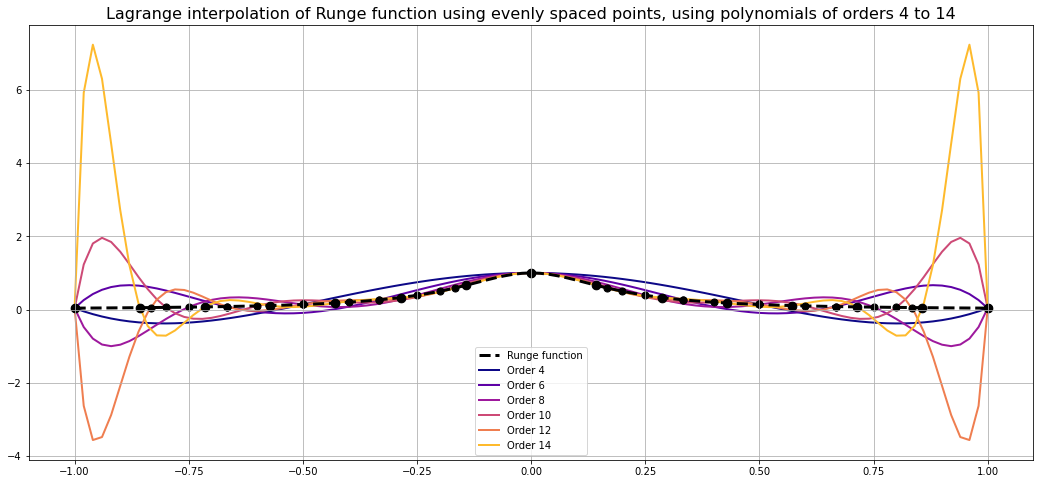

In [4]:
min_order = 4
max_order = 14

fig, ax = plt.subplots(1, 1, figsize=(18, 8))
x = [2*i/max_order - 1 for i in range(max_order + 1)]
y = [runge(x_i) for x_i in x]
actuals = [runge(x_i) for x_i in np.linspace(-1, 1, 101)]
ax.scatter(x, y, s=75, color="black", zorder=1)
ax.plot(np.linspace(-1, 1, 101), actuals, c='black', label="Runge function",
        linestyle="--", linewidth=3, zorder=1)
ax.grid()

colors = [plt.cm.plasma(i) for i in np.linspace(0, 0.85, (max_order - min_order + 1)//2 + 1)]
for n, color in zip(range(min_order, max_order + 1, 2), colors):
    x = [2*i/n - 1 for i in range(n+1)]
    y = [runge(x_i) for x_i in x]
    ax.scatter(x, y, s=50, color="black", zorder=1)
    interpolator = lagrange(x, y)
    y_interp = [interpolator(x_i) for x_i in np.linspace(-1, 1, 101)]
    ax.plot(np.linspace(-1, 1, 101), y_interp, linewidth=2, label=f"Order {n}", c=color, zorder=-1)
ax.legend()
ax.set_title(f"Lagrange interpolation of Runge function using evenly spaced points,"
             f" using polynomials of orders {min_order} to {max_order}", fontsize=16);

# Using Chebyshev nodes

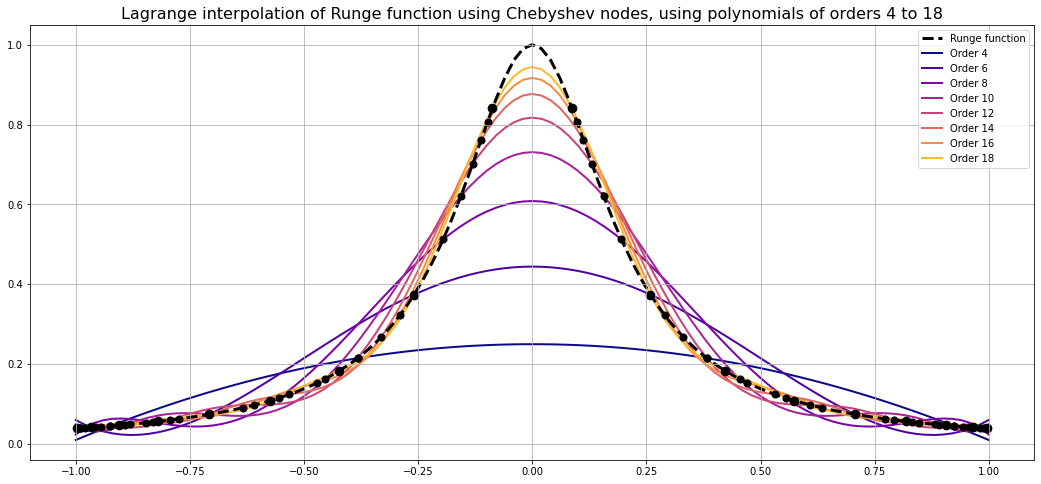

In [5]:
min_order = 4
max_order = 18

fig, ax = plt.subplots(1, 1, figsize=(18, 8))
x = [np.cos(np.pi*(2*i - 1)/(2*max_order)) for i in range(1, max_order + 1)]
y = [runge(x_i) for x_i in x]
ax.scatter(x, y, s=75, color="black", zorder=1)
ax.plot(np.linspace(-1, 1, 101), actuals, c='black', label="Runge function",
        linestyle="--", linewidth=3, zorder=1)
ax.grid()

colors = [plt.cm.plasma(i) for i in np.linspace(0, 0.85, (max_order - min_order + 1)//2 + 1)]
for n, color in zip(range(min_order, max_order + 1, 2), colors):
    x = [np.cos(np.pi*(2*i - 1)/(2*n)) for i in range(1, n + 1)]
    y = [runge(x_i) for x_i in x]
    ax.scatter(x, y, s=50, color="black", zorder=1)
    interpolator = lagrange(x, y)
    y_interp = [interpolator(x_i) for x_i in np.linspace(-1, 1, 101)]
    ax.plot(np.linspace(-1, 1, 101), y_interp, linewidth=2, label=f"Order {n}", c=color, zorder=-1)
ax.legend()
ax.set_title(f"Lagrange interpolation of Runge function using Chebyshev nodes,"
             f" using polynomials of orders {min_order} to {max_order}", fontsize=16);

# Using a cubic spline interpolator

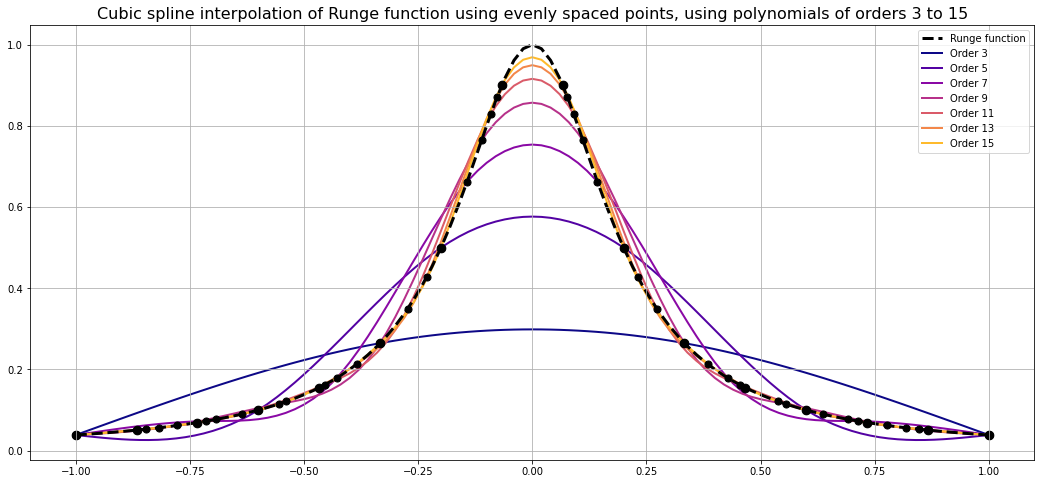

In [6]:
min_order = 3
max_order = 15

fig, ax = plt.subplots(1, 1, figsize=(18, 8))
x = [2*i/max_order - 1 for i in range(max_order + 1)]
y = [runge(x_i) for x_i in x]
actuals = [runge(x_i) for x_i in np.linspace(-1, 1, 101)]
ax.scatter(x, y, s=75, color="black", zorder=1)
ax.plot(np.linspace(-1, 1, 101), actuals, c='black', label="Runge function",
        linestyle="--", linewidth=3, zorder=1)
ax.grid()

colors = [plt.cm.plasma(i) for i in np.linspace(0, 0.85, (max_order - min_order + 1)//2 + 1)]
for n, color in zip(range(min_order, max_order + 1, 2), colors):
    x = [2*i/n - 1 for i in range(n+1)]
    y = [runge(x_i) for x_i in x]
    ax.scatter(x, y, s=50, color="black", zorder=1)
    interpolator = CubicSpline(x, y, bc_type="natural")
    y_interp = [interpolator(x_i) for x_i in np.linspace(-1, 1, 101)]
    ax.plot(np.linspace(-1, 1, 101), y_interp, linewidth=2, label=f"Order {n}", c=color, zorder=-1)
ax.legend()
ax.set_title(f"Cubic spline interpolation of Runge function using evenly spaced points,"
             f" using polynomials of orders {min_order} to {max_order}", fontsize=16);